## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!b

In [71]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier 

%matplotlib inline

In [3]:
def read_and_concat(file):
    finaldf = pd.read_csv('nfl-combine/2000Offense.csv')
    for i in file:
        df = pd.read_csv(i)
        finaldf = finaldf.append(df)
        finaldf.reset_index(drop=True, inplace = True)
    return finaldf

In [4]:
draft = ['nfl-combine/2000Defense.csv',
'nfl-combine/2001Defense.csv',
'nfl-combine/2001Offense.csv',
'nfl-combine/2002Defense.csv',
'nfl-combine/2002Offense.csv',
'nfl-combine/2003Defense.csv',
'nfl-combine/2003Offense.csv',
'nfl-combine/2004Offense.csv',
'nfl-combine/2005Defense.csv',
'nfl-combine/2005Offense.csv',
'nfl-combine/2006Defense.csv',
'nfl-combine/2006Offense.csv',
'nfl-combine/2007Defense.csv',
'nfl-combine/2007Offense.csv',
'nfl-combine/2008Defense.csv',
'nfl-combine/2008Offense.csv',
'nfl-combine/2009Defense.csv',
'nfl-combine/2009Offense.csv',
'nfl-combine/2010Defense.csv',
'nfl-combine/2010Offense.csv',
'nfl-combine/2011Defense.csv',
'nfl-combine/2011Offense.csv',
'nfl-combine/2012Defense.csv',
'nfl-combine/2012Offense.csv',
'nfl-combine/2013Defense.csv',
'nfl-combine/2013Offense.csv',
'nfl-combine/2014Defense.csv',
'nfl-combine/2014Offense.csv',
'nfl-combine/2015Defense.csv',
'nfl-combine/2015Offense.csv',
'nfl-combine/2016Defense.csv',
'nfl-combine/2016Offense.csv',
'nfl-combine/2017Defense.csv',
'nfl-combine/2017Offense.csv']

In [5]:
df = read_and_concat(draft)

In [33]:
df.head()

,Year,Pos,Height,Wt,Forty,Vertical,BenchReps,Broad_Jump,Cone,Shuttle,DraftRd,Drafted
0,2000,WR,75,191,4.53,33.0,NaN,130.0,7.09,4.18,8,0
1,2000,QB,75,229,4.91,34.0,NaN,108.0,7.71,4.59,6,1
2,2000,WR,71,180,4.59,36.0,NaN,123.0,7.22,4.16,6,1
3,2000,OT,76,332,5.26,29.0,28.0,97.0,7.78,4.72,2,1
4,2000,RB,71,193,4.50,NaN,NaN,NaN,NaN,NaN,5,1


In [6]:
df.drop(columns = ['Rk', 'College', 'Player', 'AV', 'School'], inplace = True)

In [7]:
df = df.rename(columns = {'Broad Jump':'Broad_Jump', '40YD': 'Forty', '3Cone': 'Cone'})

In [8]:
def convert_height(x):
    feet = x.split("-")[0]
    inches = x.split("-")[1]
    height = (int(feet) * 12) + int(inches)
    return height
df['Height'] = df['Height'].apply(convert_height)

In [9]:
df["Drafted (tm/rnd/yr)"] = df["Drafted (tm/rnd/yr)"].where(pd.notnull(df["Drafted (tm/rnd/yr)"]), None)
df["DraftRd"] = [x.split(" / ")[1] if x != None else None for x in df["Drafted (tm/rnd/yr)"]]
df["DraftRd"] = df["DraftRd"].str.replace('[a-zA-Z]+', '')
df = df.drop(["Drafted (tm/rnd/yr)"], axis=1)

In [10]:
df['DraftRd'] = df['DraftRd'].fillna(8)
df = df.apply(pd.to_numeric, errors='ignore')

df['Drafted'] = df['DraftRd'].apply(lambda x: 0 if x == 8 else 1)


# 2nd Df

In [40]:
df2 = df.drop(columns = ['DraftRd', 'Year'])

In [76]:
df2 = df.drop(columns = ['Height', 'Wt'])

In [53]:
df2 = df2.fillna(0)

In [74]:
df2['H/W_Ratio']= df2['Height']/df2['Wt']

In [75]:
df2.columns

Index(['Height', 'Wt', 'Forty', 'Vertical', 'BenchReps', 'Broad_Jump', 'Cone',
       'Shuttle', 'Drafted', 'Pos_DE', 'Pos_DT', 'Pos_FB', 'Pos_FS', 'Pos_ILB',
       'Pos_LS', 'Pos_OG', 'Pos_OLB', 'Pos_OT', 'Pos_P', 'Pos_QB', 'Pos_RB',
       'Pos_SS', 'Pos_TE', 'Pos_WR', 'H/W_Ratio'],
      dtype='object')

# Statistic Tests

In [13]:
tests = ['Forty', 'Vertical', 'BenchReps', 'Broad_Jump', 'Cone', 'Shuttle']

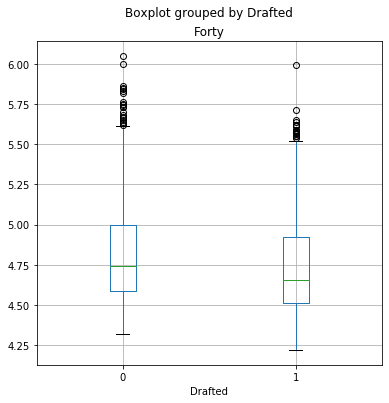

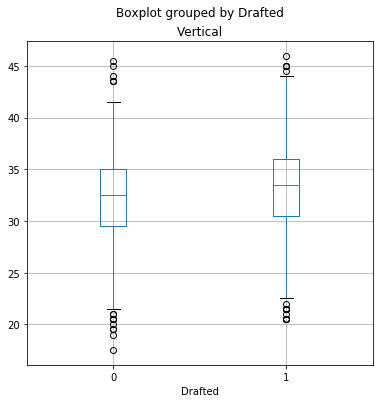

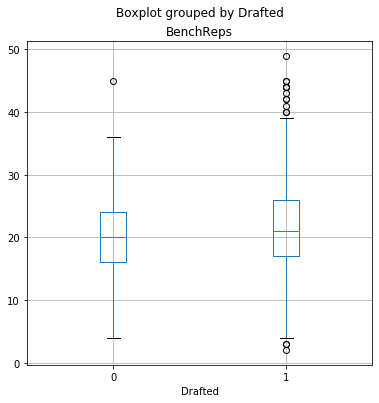

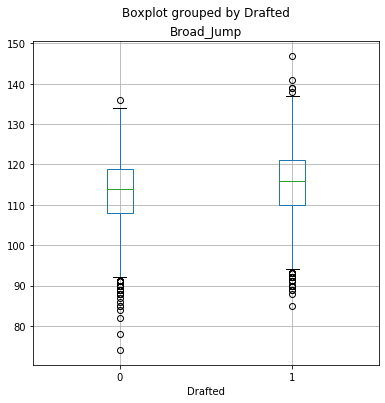

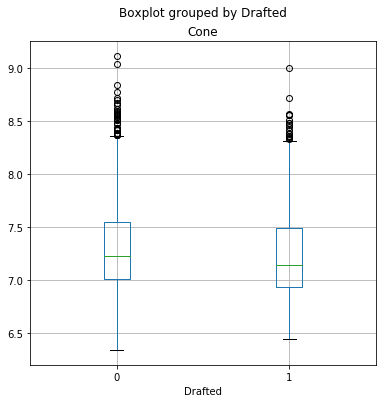

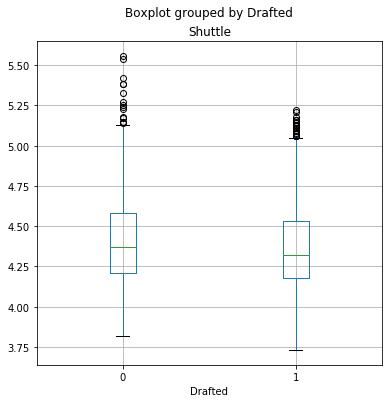

In [14]:
for col in tests:
    df2.boxplot(col, by='Drafted', figsize=(6,6))

In [15]:
# ANOVA
anova_skills = ols('Drafted ~ Vertical + BenchReps + Broad_Jump + Shuttle + Forty + Cone', data=df2).fit()
anova_table = sm.stats.anova_lm(anova_skills, type=2)
print(anova_table)

                df      sum_sq    mean_sq          F        PR(>F)
Vertical       1.0   10.724929  10.724929  51.457924  9.527918e-13
BenchReps      1.0   17.640765  17.640765  84.639926  7.200265e-20
Broad_Jump     1.0    4.789243   4.789243  22.978660  1.731587e-06
Shuttle        1.0    1.408306   1.408306   6.757014  9.391478e-03
Forty          1.0    3.332972   3.332972  15.991510  6.542368e-05
Cone           1.0    0.082749   0.082749   0.397029  5.286837e-01
Residual    2567.0  535.017540   0.208421        NaN           NaN


In [63]:
corr = df2.corr()
corr

,Height,Wt,Forty,Vertical,BenchReps,Broad_Jump,Cone,Shuttle,Drafted,Pos_DE,...,Pos_LS,Pos_OG,Pos_OLB,Pos_OT,Pos_P,Pos_QB,Pos_RB,Pos_SS,Pos_TE,Pos_WR
Height,1.000000,0.711502,0.262968,-0.119014,0.140529,-0.109529,0.097483,0.101236,0.034558,0.221839,...,0.017924,0.221542,0.005425,0.424305,0.008811,0.091564,-0.393802,-0.123083,0.236074,-0.169070
Wt,0.711502,1.000000,0.404924,-0.149086,0.406020,-0.128212,0.131453,0.139278,0.042185,0.173415,...,0.006524,0.431178,-0.009645,0.482184,-0.090582,-0.111137,-0.202090,-0.140123,0.067728,-0.381854
Forty,0.262968,0.404924,1.000000,0.040817,0.153621,0.067452,0.175445,0.183137,-0.036979,0.035605,...,0.026975,0.247969,-0.017041,0.215912,-0.146362,0.021234,-0.088415,-0.079169,-0.011604,-0.147445
Vertical,-0.119014,-0.149086,0.040817,1.000000,0.171081,0.888850,0.620735,0.632293,0.058282,-0.008133,...,-0.070897,-0.073967,0.042693,-0.071016,-0.252048,-0.004947,0.045202,0.032102,-0.003899,0.072595
BenchReps,0.140529,0.406020,0.153621,0.171081,1.000000,0.172820,0.208927,0.214786,0.085115,0.117153,...,-0.023173,0.169573,0.095915,0.141737,-0.168551,-0.300424,0.019252,0.003132,0.051500,-0.291334
Broad_Jump,-0.109529,-0.128212,0.067452,0.888850,0.172820,1.000000,0.645966,0.656006,0.042646,-0.003645,...,-0.066241,-0.061111,0.054169,-0.060052,-0.254147,0.015839,0.039978,0.034902,-0.005969,0.045294
Cone,0.097483,0.131453,0.175445,0.620735,0.208927,0.645966,1.000000,0.912895,0.012090,0.024575,...,-0.068738,0.082586,0.019057,0.079728,-0.196473,0.056773,-0.058418,-0.023048,0.000561,-0.031643
Shuttle,0.101236,0.139278,0.183137,0.632293,0.214786,0.656006,0.912895,1.000000,0.005545,0.021413,...,-0.070018,0.089780,0.017581,0.084884,-0.200544,0.058929,-0.069946,-0.031726,-0.002551,-0.025406
Drafted,0.034558,0.042185,-0.036979,0.058282,0.085115,0.042646,0.012090,0.005545,1.000000,0.035064,...,-0.046562,-0.047603,0.059195,0.019144,-0.117047,-0.029347,-0.032221,0.004962,-0.000502,-0.032786
Pos_DE,0.221839,0.173415,0.035605,-0.008133,0.117153,-0.003645,0.024575,0.021413,0.035064,1.000000,...,-0.017460,-0.079073,-0.080914,-0.087137,-0.042168,-0.075051,-0.094721,-0.058353,-0.073714,-0.123550


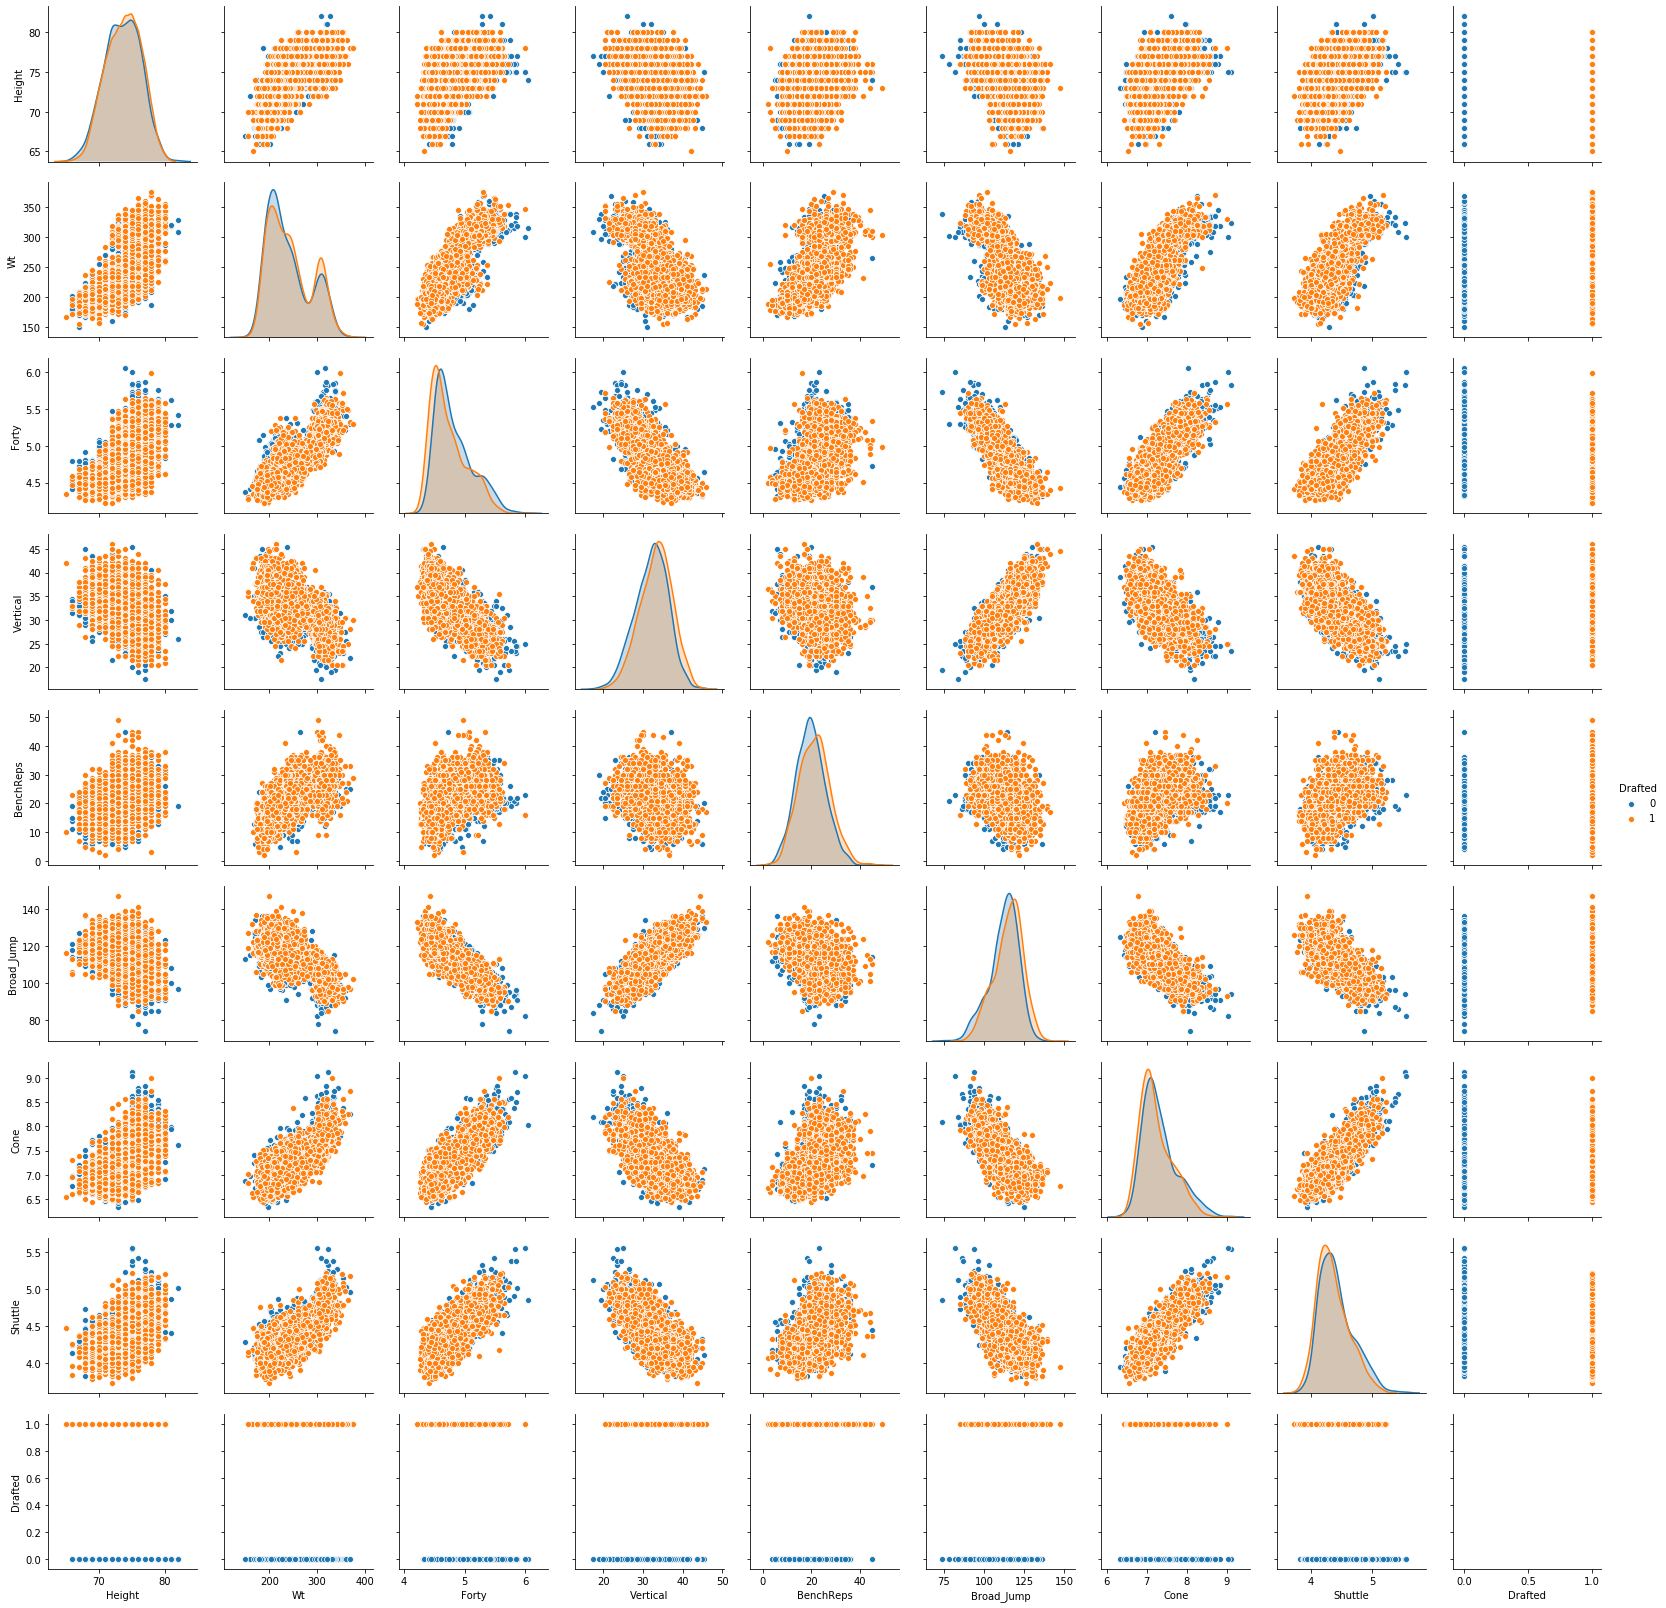

In [31]:
sns.pairplot(df2, hue = 'Drafted')

In [27]:
df2.groupby('Pos')['Drafted'].count()

Pos
CB     560
DE     441
DT     408
FB     116
FS     211
ILB    252
LS      19
OG     365
OLB    381
OT     437
P      109
QB     331
RB     509
SS     205
TE     320
WR     813
Name: Drafted, dtype: int64

In [42]:
pos_dummies = pd.get_dummies(df2['Pos'], prefix = 'Pos', drop_first = True)
df2 = df2.drop(['Pos'], axis=1)
df2 = pd.concat([df2, pos_dummies], axis=1)

In [36]:
df2['Drafted'].value_counts()

1    3514
0    1963
Name: Drafted, dtype: int64

# Modeling

## KNN

In [77]:
X = df2.drop(columns = ['Drafted'])
y = df2['Drafted']
X_train, X_test, y_train,  y_test  = train_test_split(X, y, random_state = 2)

In [56]:
minmax = MinMaxScaler()
minmax.fit(X_train)

X_trainmm = minmax.transform(X_train)
X_testmm = minmax.transform(X_test)

In [61]:
scaler = StandardScaler()
scaler.fit(X_train)

X_trainstand = scaler.transform(X_train)
X_teststand = scaler.transform(X_test)

In [58]:
# not scaled
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train, y_train)
y_pred =knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
print(accuracy, test_f1)

0.6175182481751825 0.720384204909285


In [59]:
# min max
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_trainmm, y_train)
y_pred =knn.predict(X_testmm)
accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
print(accuracy, test_f1)

0.6204379562043796 0.7207303974221267


In [66]:
# standardized 
knn = KNeighborsClassifier(n_neighbors= 17)
knn.fit(X_trainstand, y_train)
y_pred =knn.predict(X_teststand)
accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
print(accuracy, test_f1)

0.6642335766423357 0.7745098039215687


In [70]:
# k=17 is best fit
k_scores =[]

k_range = list(range(3,20))
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_trainstand, y_train)
    
    y_pred =knn.predict(X_teststand)
    
    test_f1 = f1_score(y_test, y_pred)
    
    k_scores.append(test_f1)
print(k_scores)

[0.7325456498388829, 0.6781883194278904, 0.7457805907172995, 0.708215297450425, 0.7575602255253715, 0.730958904109589, 0.7644982349974785, 0.7453482190324295, 0.7690773067331671, 0.7502601456815816, 0.7719644619940769, 0.7601438109912686, 0.7728174603174605, 0.7626339969372129, 0.7745098039215687, 0.7603222557905338, 0.7733463035019457]


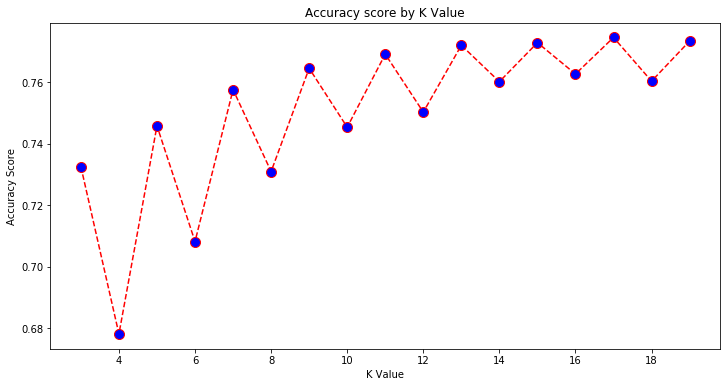

In [69]:
plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy Score') 
plt.show()

## Random Forest

In [73]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
f1 = f1_score(y_test, preds)
accuracy = accuracy_score(y_test, preds)
print(accuracy, f1)

0.6970802919708029 0.7819232790331055
